<a href="https://colab.research.google.com/github/andresvivancov/Administradora-de-Fondos-y-Fideicomisos/blob/main/ANEFI_Data_Science_BI_v2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANEFI2 Data Science BI by AV


## 0. Info

From: https://github.com/andresvivancov/Administradora-de-Fondos-y-Fideicomisos/tree/main/data


Data Sources: https://github.com/andresvivancov/Administradora-de-Fondos-y-Fideicomisos/blob/main/data/prueba_bi.csv


Andres Vivanco 


January 2021

## 1. Data Collection & Integration

In [1]:
# ANEFI
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv ('https://raw.githubusercontent.com/andresvivancov/Administradora-de-Fondos-y-Fideicomisos/main/data/prueba_bi_preprocesado.csv', delimiter = ';', decimal = ',', encoding = 'utf-8', header=0)

## 2. Data Preparation

In [3]:
df.head(3)

,ID,Cliente,RAMA_ACTIVIDAD,DESCRIPCION_RAMA,Efectivo_y_Equiv,ACTIVOS_CORRIENTES,Otros_Act_Corr,Otros_Act_No_Corr,ACTIVOS_NO_CORRIENTES,ACTIVO,Credito_Mutuo,Oblig_emit_por_corr,Arrend_Financiero_CxP,Imp_Renta_CxP,PASIVOS_CORRIENTES,Credito_Mutuo_No_corr,Oblig_emit_porc_No_corr,Arrend_Financiero_CxP_No_Corr,Pas_Imp_Renta_Dif_No_Corr,PASIVOS_NO_CORRIENTES,PASIVO,Capital,Futuras_capitalizaciones,PATRIMONIO,PART_TRABAJADORES,IMPUESTO_CAUSADO,Ganancias_Act_Disc,INGRESOS,G_Perdidas_Act_Disc,COSTOS,GASTOS,CxC_DxC_Corr,Otros_Act_Fin_Corr,Arren_Fin_CxC,Imp_bruto_const,Activos_x_Imp_corr,Inventarios,Act_No_Corr_Venta,Act_Biologicos_corr,Pagos_anticipos,...,Otros_Pas_Fin_No_Corr,Benf_Emp_No_Corr,Prov_No_Corr,Pas_Ing_Dif_No_Corr,Otros_Pas_No_Corr,Cap_Sus_No_Pagado,Reservas,Res_Acum,Otros_Res_Int_Acum,Ing_Act_Ord,Otros_Ing,Ing_Finc,VAL_ING,Costo_de_Venta,C_Gastos_Benf_Empl,C_Gastos_Dep,C_Gastos_Amort,C_Perdidas_deterioro,C_Gasto_Provis,C_Perdida_Venta_Act,C_Otros_Gastos,VAL_COSTOS,G_Costo_de_Venta,G_Gastos_Benf_Empl,G_Gastos_Dep,G_Gastos_Amort,G_Perdidas_deterioro,G_Gasto_Provis,G_Perdida_Venta_Act,G_Otros_Gastos,G_Gastos_Financieros,VAL_GASTOS,T_COMPRAS_IMPORT,COSTO_NOMINA,GASTO_NOMINA,VAL_ACT_CORRIENTE,VAL_ACT_NO_CORR,VAL_PAS_CORR,VAL_PAS_NO_CORR,VAL_PATRIMONIO
0,1,Si,G,COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÓ...,14117834.20,54617757.8,0.00,1756219.88,26814344.5,81432102.3,0.0,0.0,1576015.4,299848.12,30813080.90,0.0,0.0,2338398.52,21056.13,14596311.8,45409392.7,17100004.0,0.0,36022709.6,772600.74,0,0,0,0,0,0,27436940.35,1764179.62,0.0,0.0,91498.22,11067076.67,0.00,0.0,140228.77,...,0.0,5616264.10,0.0,0.0,0.00,0.0,12004989.40,6216582.31,701133.89,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.03,0.02,-0.02,0.01,0.00
1,2,Si,C,INDUSTRIAS MANUFACTURERAS.,1699491.59,27231693.4,0.00,0.00,32338755.0,59570448.5,0.0,0.0,0.0,0.00,20120422.30,0.0,0.0,0.00,0.00,14596758.0,34717180.3,16683800.0,400.0,24853268.2,603540.76,0,0,0,0,0,0,16095012.34,0.00,0.0,0.0,916161.35,6565478.83,1380919.75,0.0,574629.58,...,0.0,1632911.88,0.0,0.0,0.00,0.0,2363950.85,5784715.18,20402.17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.04,-0.04,0.02,0.02,0.00
2,3,Si,G,COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÓ...,13312326.30,62152533.3,64277.09,0.00,15905319.6,78057852.8,0.0,0.0,0.0,0.00,9965207.05,0.0,0.0,0.00,222087.11,27597835.4,37563042.5,7029352.0,0.0,40494810.4,0.00,0,0,0,0,0,0,20014356.60,0.00,0.0,0.0,2383762.51,26289924.85,0.00,0.0,87886.02,...,0.0,3070479.24,0.0,0.0,249398.68,0.0,3648871.13,29190306.23,626281.05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.07,0.04,0.00,-0.03,-0.01


In [4]:
#df.set_index('ID')

In [5]:
df.describe

<bound method NDFrame.describe of         ID Cliente  ... VAL_PAS_NO_CORR VAL_PATRIMONIO
0        1      Si  ...            0.01   0.000000e+00
1        2      Si  ...            0.02   0.000000e+00
2        3      Si  ...           -0.03  -9.999998e-03
3        4      Si  ...            0.00   3.000000e-02
4        5      Si  ...           -0.03  -3.000000e-02
...    ...     ...  ...             ...            ...
1821  1822      No  ...            0.00   0.000000e+00
1822  1823      No  ...            0.00   0.000000e+00
1823  1824      No  ...            0.00   0.000000e+00
1824  1825      No  ...            0.00   5.820766e-11
1825  1826      No  ...            0.00   5.820766e-11

[1826 rows x 99 columns]>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 99 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             1826 non-null   int64  
 1   Cliente                        1826 non-null   object 
 2   RAMA_ACTIVIDAD                 1826 non-null   object 
 3   DESCRIPCION_RAMA               1826 non-null   object 
 4   Efectivo_y_Equiv               1826 non-null   float64
 5   ACTIVOS_CORRIENTES             1826 non-null   float64
 6   Otros_Act_Corr                 1826 non-null   float64
 7   Otros_Act_No_Corr              1826 non-null   float64
 8   ACTIVOS_NO_CORRIENTES          1826 non-null   float64
 9   ACTIVO                         1826 non-null   float64
 10  Credito_Mutuo                  1826 non-null   float64
 11  Oblig_emit_por_corr            1826 non-null   float64
 12  Arrend_Financiero_CxP          1826 non-null   f

In [7]:
df.shape

(1826, 99)

In [8]:
df.tail(4)

,ID,Cliente,RAMA_ACTIVIDAD,DESCRIPCION_RAMA,Efectivo_y_Equiv,ACTIVOS_CORRIENTES,Otros_Act_Corr,Otros_Act_No_Corr,ACTIVOS_NO_CORRIENTES,ACTIVO,Credito_Mutuo,Oblig_emit_por_corr,Arrend_Financiero_CxP,Imp_Renta_CxP,PASIVOS_CORRIENTES,Credito_Mutuo_No_corr,Oblig_emit_porc_No_corr,Arrend_Financiero_CxP_No_Corr,Pas_Imp_Renta_Dif_No_Corr,PASIVOS_NO_CORRIENTES,PASIVO,Capital,Futuras_capitalizaciones,PATRIMONIO,PART_TRABAJADORES,IMPUESTO_CAUSADO,Ganancias_Act_Disc,INGRESOS,G_Perdidas_Act_Disc,COSTOS,GASTOS,CxC_DxC_Corr,Otros_Act_Fin_Corr,Arren_Fin_CxC,Imp_bruto_const,Activos_x_Imp_corr,Inventarios,Act_No_Corr_Venta,Act_Biologicos_corr,Pagos_anticipos,...,Otros_Pas_Fin_No_Corr,Benf_Emp_No_Corr,Prov_No_Corr,Pas_Ing_Dif_No_Corr,Otros_Pas_No_Corr,Cap_Sus_No_Pagado,Reservas,Res_Acum,Otros_Res_Int_Acum,Ing_Act_Ord,Otros_Ing,Ing_Finc,VAL_ING,Costo_de_Venta,C_Gastos_Benf_Empl,C_Gastos_Dep,C_Gastos_Amort,C_Perdidas_deterioro,C_Gasto_Provis,C_Perdida_Venta_Act,C_Otros_Gastos,VAL_COSTOS,G_Costo_de_Venta,G_Gastos_Benf_Empl,G_Gastos_Dep,G_Gastos_Amort,G_Perdidas_deterioro,G_Gasto_Provis,G_Perdida_Venta_Act,G_Otros_Gastos,G_Gastos_Financieros,VAL_GASTOS,T_COMPRAS_IMPORT,COSTO_NOMINA,GASTO_NOMINA,VAL_ACT_CORRIENTE,VAL_ACT_NO_CORR,VAL_PAS_CORR,VAL_PAS_NO_CORR,VAL_PATRIMONIO
1822,1823,No,L,ACTIVIDADES INMOBILIARIAS.,374366.87,19692614.40,0.00,308.65,401997.93,20094612.40,0.0,0.0,0.00,0.00,12704205.60,0.0,0.0,0.00,0.0,5459424.83,18163630.40,800.00,2066580.28,1930981.95,0.00,0,0,0,0,0,0,3170829.71,0.0,0.0,0.00,9130.46,16131406.59,0.0,0.0,6880.80,...,0.0,0.00,0.0,0.0,24403.62,0.0,0.00,-136398.33,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.03,-5.820766e-11,0.02,0.0,0.000000e+00
1823,1824,No,E,"DISTRIBUCIÓN DE AGUA ALCANTARILLADO, GESTIÓN D...",1436962.54,6932607.10,24927.62,0.00,1773291.55,8705898.65,0.0,0.0,223071.48,0.00,2063210.79,0.0,0.0,678980.85,0.0,4502008.89,6565219.68,372045.69,609964.00,2140678.97,137009.36,0,0,0,0,0,0,4255561.36,0.0,0.0,585858.15,481658.38,139419.84,0.0,0.0,8219.21,...,0.0,223028.04,0.0,0.0,0.00,0.0,1450000.00,-301468.58,10137.86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,2.328306e-10,0.00,0.0,0.000000e+00
1824,1825,No,C,INDUSTRIAS MANUFACTURERAS.,10947.81,453869.17,0.00,3427.29,317120.28,770989.45,0.0,0.0,0.00,45088.79,433948.10,0.0,0.0,0.00,0.0,37264.59,471212.69,1000.00,0.00,299776.76,37120.42,0,0,0,0,0,0,399827.29,0.0,0.0,0.00,43094.07,0.00,0.0,0.0,0.00,...,0.0,0.00,0.0,0.0,0.00,0.0,43081.98,255694.78,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,1.164153e-10,0.00,0.0,5.820766e-11
1825,1826,No,A,"AGRICULTURA, GANADERÍA, SILVICULTURA Y PESCA.",4526.97,61474.17,0.00,0.00,891400.57,952874.74,0.0,0.0,0.00,0.00,187302.80,0.0,0.0,0.00,0.0,390497.11,577799.91,250000.00,0.00,375074.83,930.31,0,0,0,0,0,0,56443.54,0.0,0.0,0.00,503.66,0.00,0.0,0.0,0.00,...,0.0,0.00,0.0,0.0,0.00,0.0,545.72,124529.11,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,-1.164153e-10,0.00,0.0,5.820766e-11


Checking null values in df

In [9]:
df.isnull().sum()

ID                   0
Cliente              0
RAMA_ACTIVIDAD       0
DESCRIPCION_RAMA     0
Efectivo_y_Equiv     0
                    ..
VAL_ACT_CORRIENTE    0
VAL_ACT_NO_CORR      0
VAL_PAS_CORR         0
VAL_PAS_NO_CORR      0
VAL_PATRIMONIO       0
Length: 99, dtype: int64

In [10]:
df.isnull().values.any()

False

In [11]:
datawithoutnulls = df.dropna(how='all', axis=1)

In [12]:
datawithoutnulls.isnull().sum()

ID                   0
Cliente              0
RAMA_ACTIVIDAD       0
DESCRIPCION_RAMA     0
Efectivo_y_Equiv     0
                    ..
VAL_ACT_CORRIENTE    0
VAL_ACT_NO_CORR      0
VAL_PAS_CORR         0
VAL_PAS_NO_CORR      0
VAL_PATRIMONIO       0
Length: 99, dtype: int64

In [13]:
datawithoutnulls.isnull().values.any()

False

In [14]:
datawithoutnulls.shape

(1826, 99)

In [15]:
datawithoutnulls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 99 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             1826 non-null   int64  
 1   Cliente                        1826 non-null   object 
 2   RAMA_ACTIVIDAD                 1826 non-null   object 
 3   DESCRIPCION_RAMA               1826 non-null   object 
 4   Efectivo_y_Equiv               1826 non-null   float64
 5   ACTIVOS_CORRIENTES             1826 non-null   float64
 6   Otros_Act_Corr                 1826 non-null   float64
 7   Otros_Act_No_Corr              1826 non-null   float64
 8   ACTIVOS_NO_CORRIENTES          1826 non-null   float64
 9   ACTIVO                         1826 non-null   float64
 10  Credito_Mutuo                  1826 non-null   float64
 11  Oblig_emit_por_corr            1826 non-null   float64
 12  Arrend_Financiero_CxP          1826 non-null   f

In [16]:
print(len(datawithoutnulls.columns))

99


In [17]:
df = datawithoutnulls

In [18]:
col = df.astype(bool).sum(axis=0).sort_values(ascending = False)
col.shape

(99,)

In [19]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [20]:
df = df.loc[:, (df==0).mean() < .7]

In [21]:
df.shape

(1826, 35)

In [22]:
df = df.loc[:, df.isnull().mean() < .7] #7

In [23]:
df.shape

(1826, 35)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1826 non-null   int64  
 1   Cliente                1826 non-null   object 
 2   RAMA_ACTIVIDAD         1826 non-null   object 
 3   DESCRIPCION_RAMA       1826 non-null   object 
 4   Efectivo_y_Equiv       1826 non-null   float64
 5   ACTIVOS_CORRIENTES     1826 non-null   float64
 6   ACTIVOS_NO_CORRIENTES  1826 non-null   float64
 7   ACTIVO                 1826 non-null   float64
 8   Imp_Renta_CxP          1826 non-null   float64
 9   PASIVOS_CORRIENTES     1826 non-null   float64
 10  PASIVOS_NO_CORRIENTES  1826 non-null   float64
 11  PASIVO                 1826 non-null   float64
 12  Capital                1826 non-null   float64
 13  PATRIMONIO             1826 non-null   float64
 14  PART_TRABAJADORES      1826 non-null   float64
 15  CxC_

###Checking correlation

In [25]:
df.corr(method= 'pearson')

,ID,Efectivo_y_Equiv,ACTIVOS_CORRIENTES,ACTIVOS_NO_CORRIENTES,ACTIVO,Imp_Renta_CxP,PASIVOS_CORRIENTES,PASIVOS_NO_CORRIENTES,PASIVO,Capital,PATRIMONIO,PART_TRABAJADORES,CxC_DxC_Corr,Activos_x_Imp_corr,Inventarios,Pagos_anticipos,Propiedad_Planta_Equ,Act_Imp_Diferido,CxP_DxP_Corr,Obli_inst_fin_corr,Benf_Emp_Corr,Pas_Ing_Dif_Corr,Otros_Pas_Corr,CxP_DxP_No_Corr,Benf_Emp_No_Corr,Reservas,Res_Acum,Otros_Res_Int_Acum,VAL_ACT_CORRIENTE,VAL_ACT_NO_CORR,VAL_PAS_CORR,VAL_PATRIMONIO
ID,1.000000,-0.111625,-0.157726,-0.123240,-0.150541,-0.074767,-0.133290,-0.065832,-0.119744,-0.131570,-0.177041,-0.100431,-0.122431,-0.084663,-0.165733,-0.093721,-0.143735,-0.071838,-0.125100,-0.102014,-0.139428,-0.026630,-0.062247,0.003119,-0.179904,-0.118612,-0.136625,-0.095234,-0.010530,0.017210,0.031708,0.005179
Efectivo_y_Equiv,-0.111625,1.000000,0.739816,0.657756,0.758732,0.509997,0.653810,0.543779,0.700070,0.710950,0.734809,0.527555,0.558884,0.279301,0.517145,0.366281,0.530706,0.350061,0.600442,0.387515,0.649558,0.169359,0.229036,0.039208,0.577016,0.664394,0.367268,0.077824,0.231823,-0.193143,-0.302913,-0.003166
ACTIVOS_CORRIENTES,-0.157726,0.739816,1.000000,0.641932,0.862394,0.454674,0.875842,0.504304,0.823431,0.684484,0.790002,0.521732,0.915385,0.507503,0.806946,0.496616,0.619945,0.314336,0.813343,0.694729,0.705656,0.182706,0.320202,0.111166,0.679555,0.595410,0.510876,0.225035,0.122452,-0.108316,-0.275562,0.021819
ACTIVOS_NO_CORRIENTES,-0.123240,0.657756,0.641932,1.000000,0.941762,0.560515,0.756680,0.830992,0.913124,0.637103,0.840018,0.670266,0.528141,0.413560,0.481367,0.461532,0.782405,0.328546,0.693537,0.524480,0.703534,0.218167,0.404042,0.300681,0.552690,0.543946,0.660626,0.393137,0.076274,-0.099493,-0.179055,0.010935
ACTIVO,-0.150541,0.758732,0.862394,0.941762,1.000000,0.569475,0.883701,0.769818,0.964004,0.720829,0.901077,0.671346,0.750156,0.495621,0.671717,0.522519,0.788456,0.354775,0.814602,0.650966,0.773975,0.224169,0.407192,0.247272,0.662936,0.620259,0.660220,0.358254,0.104062,-0.113193,-0.239071,0.016789
Imp_Renta_CxP,-0.074767,0.509997,0.454674,0.560515,0.569475,1.000000,0.680478,0.238085,0.561308,0.301946,0.493028,0.793354,0.460754,0.193503,0.188849,0.261702,0.601875,0.213749,0.682122,0.232462,0.648731,0.122569,0.527770,0.000071,0.219317,0.450849,0.454169,0.142446,0.324218,0.033318,-0.282473,-0.003438
PASIVOS_CORRIENTES,-0.133290,0.653810,0.875842,0.756680,0.883701,0.680478,1.000000,0.487906,0.895310,0.576472,0.725468,0.650101,0.845767,0.471568,0.629674,0.491271,0.720003,0.418585,0.960261,0.695162,0.724774,0.203174,0.465432,0.140627,0.545203,0.546910,0.522109,0.258753,0.230562,-0.091361,-0.339929,0.007775
PASIVOS_NO_CORRIENTES,-0.065832,0.543779,0.504304,0.830992,0.769818,0.238085,0.487906,1.000000,0.825653,0.421215,0.557403,0.360864,0.411119,0.332145,0.377127,0.402668,0.451573,0.163926,0.402964,0.457471,0.433982,0.244283,0.209463,0.447181,0.403995,0.355735,0.466533,0.200592,-0.042876,-0.282011,-0.035535,0.000353
PASIVO,-0.119744,0.700070,0.823431,0.913124,0.964004,0.561308,0.895310,0.825653,1.000000,0.587539,0.753337,0.604330,0.756440,0.474284,0.599427,0.523006,0.695799,0.354196,0.826279,0.682754,0.689906,0.255976,0.407712,0.319090,0.558541,0.535017,0.575528,0.269603,0.127139,-0.202961,-0.237840,0.005205
Capital,-0.131570,0.710950,0.684484,0.637103,0.720829,0.301946,0.576472,0.421215,0.587539,1.000000,0.824598,0.399527,0.509560,0.338017,0.566815,0.322037,0.684970,0.310298,0.489665,0.468030,0.584122,0.094310,0.200709,0.030485,0.731335,0.395990,0.264173,0.242329,0.061726,0.029636,-0.295602,0.039774


In [26]:
df.corr()

,ID,Efectivo_y_Equiv,ACTIVOS_CORRIENTES,ACTIVOS_NO_CORRIENTES,ACTIVO,Imp_Renta_CxP,PASIVOS_CORRIENTES,PASIVOS_NO_CORRIENTES,PASIVO,Capital,PATRIMONIO,PART_TRABAJADORES,CxC_DxC_Corr,Activos_x_Imp_corr,Inventarios,Pagos_anticipos,Propiedad_Planta_Equ,Act_Imp_Diferido,CxP_DxP_Corr,Obli_inst_fin_corr,Benf_Emp_Corr,Pas_Ing_Dif_Corr,Otros_Pas_Corr,CxP_DxP_No_Corr,Benf_Emp_No_Corr,Reservas,Res_Acum,Otros_Res_Int_Acum,VAL_ACT_CORRIENTE,VAL_ACT_NO_CORR,VAL_PAS_CORR,VAL_PATRIMONIO
ID,1.000000,-0.111625,-0.157726,-0.123240,-0.150541,-0.074767,-0.133290,-0.065832,-0.119744,-0.131570,-0.177041,-0.100431,-0.122431,-0.084663,-0.165733,-0.093721,-0.143735,-0.071838,-0.125100,-0.102014,-0.139428,-0.026630,-0.062247,0.003119,-0.179904,-0.118612,-0.136625,-0.095234,-0.010530,0.017210,0.031708,0.005179
Efectivo_y_Equiv,-0.111625,1.000000,0.739816,0.657756,0.758732,0.509997,0.653810,0.543779,0.700070,0.710950,0.734809,0.527555,0.558884,0.279301,0.517145,0.366281,0.530706,0.350061,0.600442,0.387515,0.649558,0.169359,0.229036,0.039208,0.577016,0.664394,0.367268,0.077824,0.231823,-0.193143,-0.302913,-0.003166
ACTIVOS_CORRIENTES,-0.157726,0.739816,1.000000,0.641932,0.862394,0.454674,0.875842,0.504304,0.823431,0.684484,0.790002,0.521732,0.915385,0.507503,0.806946,0.496616,0.619945,0.314336,0.813343,0.694729,0.705656,0.182706,0.320202,0.111166,0.679555,0.595410,0.510876,0.225035,0.122452,-0.108316,-0.275562,0.021819
ACTIVOS_NO_CORRIENTES,-0.123240,0.657756,0.641932,1.000000,0.941762,0.560515,0.756680,0.830992,0.913124,0.637103,0.840018,0.670266,0.528141,0.413560,0.481367,0.461532,0.782405,0.328546,0.693537,0.524480,0.703534,0.218167,0.404042,0.300681,0.552690,0.543946,0.660626,0.393137,0.076274,-0.099493,-0.179055,0.010935
ACTIVO,-0.150541,0.758732,0.862394,0.941762,1.000000,0.569475,0.883701,0.769818,0.964004,0.720829,0.901077,0.671346,0.750156,0.495621,0.671717,0.522519,0.788456,0.354775,0.814602,0.650966,0.773975,0.224169,0.407192,0.247272,0.662936,0.620259,0.660220,0.358254,0.104062,-0.113193,-0.239071,0.016789
Imp_Renta_CxP,-0.074767,0.509997,0.454674,0.560515,0.569475,1.000000,0.680478,0.238085,0.561308,0.301946,0.493028,0.793354,0.460754,0.193503,0.188849,0.261702,0.601875,0.213749,0.682122,0.232462,0.648731,0.122569,0.527770,0.000071,0.219317,0.450849,0.454169,0.142446,0.324218,0.033318,-0.282473,-0.003438
PASIVOS_CORRIENTES,-0.133290,0.653810,0.875842,0.756680,0.883701,0.680478,1.000000,0.487906,0.895310,0.576472,0.725468,0.650101,0.845767,0.471568,0.629674,0.491271,0.720003,0.418585,0.960261,0.695162,0.724774,0.203174,0.465432,0.140627,0.545203,0.546910,0.522109,0.258753,0.230562,-0.091361,-0.339929,0.007775
PASIVOS_NO_CORRIENTES,-0.065832,0.543779,0.504304,0.830992,0.769818,0.238085,0.487906,1.000000,0.825653,0.421215,0.557403,0.360864,0.411119,0.332145,0.377127,0.402668,0.451573,0.163926,0.402964,0.457471,0.433982,0.244283,0.209463,0.447181,0.403995,0.355735,0.466533,0.200592,-0.042876,-0.282011,-0.035535,0.000353
PASIVO,-0.119744,0.700070,0.823431,0.913124,0.964004,0.561308,0.895310,0.825653,1.000000,0.587539,0.753337,0.604330,0.756440,0.474284,0.599427,0.523006,0.695799,0.354196,0.826279,0.682754,0.689906,0.255976,0.407712,0.319090,0.558541,0.535017,0.575528,0.269603,0.127139,-0.202961,-0.237840,0.005205
Capital,-0.131570,0.710950,0.684484,0.637103,0.720829,0.301946,0.576472,0.421215,0.587539,1.000000,0.824598,0.399527,0.509560,0.338017,0.566815,0.322037,0.684970,0.310298,0.489665,0.468030,0.584122,0.094310,0.200709,0.030485,0.731335,0.395990,0.264173,0.242329,0.061726,0.029636,-0.295602,0.039774


In [27]:
df.shape

(1826, 35)

In [28]:
datacluster = df

In [29]:
data = df.iloc[:60,:] # 60 bueno #200 soso



In [30]:
#data = df

In [31]:
data.groupby(['Cliente']).size()

Cliente
No    34
Si    26
dtype: int64

In [32]:
df = data

In [33]:
#Change SI to 1 and No to 0
cliente_map = {'Si': 1, 'No': 0}

In [34]:
df['Cliente'] = df['Cliente'].map(cliente_map)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
df.head(5)

,ID,Cliente,RAMA_ACTIVIDAD,DESCRIPCION_RAMA,Efectivo_y_Equiv,ACTIVOS_CORRIENTES,ACTIVOS_NO_CORRIENTES,ACTIVO,Imp_Renta_CxP,PASIVOS_CORRIENTES,PASIVOS_NO_CORRIENTES,PASIVO,Capital,PATRIMONIO,PART_TRABAJADORES,CxC_DxC_Corr,Activos_x_Imp_corr,Inventarios,Pagos_anticipos,Propiedad_Planta_Equ,Act_Imp_Diferido,CxP_DxP_Corr,Obli_inst_fin_corr,Benf_Emp_Corr,Pas_Ing_Dif_Corr,Otros_Pas_Corr,CxP_DxP_No_Corr,Benf_Emp_No_Corr,Reservas,Res_Acum,Otros_Res_Int_Acum,VAL_ACT_CORRIENTE,VAL_ACT_NO_CORR,VAL_PAS_CORR,VAL_PATRIMONIO
0,1,1,G,COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÓ...,14117834.20,54617757.80,26814344.50,81432102.3,299848.12,30813080.90,14596311.80,45409392.70,17100004.0,36022709.6,772600.74,27436940.35,91498.22,11067076.67,140228.77,14381686.24,471362.49,20716400.57,5922849.35,1760287.93,0.00,0.00,0.00,5616264.10,12004989.40,6216582.31,701133.89,-0.03,2.000000e-02,-0.02,0.00
1,2,1,C,INDUSTRIAS MANUFACTURERAS.,1699491.59,27231693.40,32338755.00,59570448.5,0.00,20120422.30,14596758.00,34717180.30,16683800.0,24853268.2,603540.76,16095012.34,916161.35,6565478.83,574629.58,24218128.87,195495.02,13259278.19,6284155.45,150307.22,0.00,0.00,0.00,1632911.88,2363950.85,5784715.18,20402.17,-0.04,-4.000000e-02,0.02,0.00
2,3,1,G,COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÓ...,13312326.30,62152533.30,15905319.60,78057852.8,0.00,9965207.05,27597835.40,37563042.50,7029352.0,40494810.4,0.00,20014356.60,2383762.51,26289924.85,87886.02,10700172.96,745742.89,8165272.59,0.00,603995.37,0.00,0.00,0.00,3070479.24,3648871.13,29190306.23,626281.05,-0.07,4.000000e-02,0.00,-0.01
3,4,1,C,INDUSTRIAS MANUFACTURERAS.,690572.85,9723424.67,5650292.81,15373717.5,0.00,2415155.75,2926078.96,5341234.71,2339000.0,10032482.8,103555.82,4244536.36,407908.27,4337815.53,42591.66,5563948.35,60544.46,1401959.51,498619.68,221078.81,0.00,293497.75,0.00,1819739.74,1157038.59,4595793.12,1940651.06,0.00,-1.862645e-09,0.00,0.03
4,5,1,C,INDUSTRIAS MANUFACTURERAS.,921318.64,21743701.90,30953667.60,52697369.5,0.00,19307720.30,17302670.70,36610391.00,6572000.0,16086978.5,454324.89,13090114.95,722585.65,6611736.62,165828.16,30120450.32,85716.40,7896538.61,10428011.78,753344.11,106978.61,113418.05,3328554.75,1288320.12,535971.22,9449244.07,-470236.76,-0.01,3.000001e-02,0.00,-0.03


In [36]:
#Converting the Categorical variables to numbers
df['RAMA_ACTIVIDAD'] =df['RAMA_ACTIVIDAD'].astype('category').cat.codes
df['DESCRIPCION_RAMA'] =df['DESCRIPCION_RAMA'].astype('category').cat.codes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
df[df.columns[1:]].corr()['Cliente'][:].sort_values(ascending = False)

Cliente                  1.000000
RAMA_ACTIVIDAD           0.428727
CxP_DxP_No_Corr          0.250647
VAL_PATRIMONIO           0.113845
VAL_ACT_NO_CORR          0.078810
Res_Acum                 0.020228
VAL_PAS_CORR             0.004267
CxC_DxC_Corr            -0.026981
Imp_Renta_CxP           -0.057548
Efectivo_y_Equiv        -0.063696
PART_TRABAJADORES       -0.073750
CxP_DxP_Corr            -0.079098
Activos_x_Imp_corr      -0.090908
Benf_Emp_Corr           -0.101011
PASIVOS_NO_CORRIENTES   -0.113822
Otros_Pas_Corr          -0.114718
Reservas                -0.134235
ACTIVOS_CORRIENTES      -0.136585
Propiedad_Planta_Equ    -0.140184
PASIVO                  -0.145388
PATRIMONIO              -0.145500
Obli_inst_fin_corr      -0.148021
Capital                 -0.151039
PASIVOS_CORRIENTES      -0.152337
ACTIVO                  -0.158667
Otros_Res_Int_Acum      -0.164627
Inventarios             -0.171605
ACTIVOS_NO_CORRIENTES   -0.173441
Pagos_anticipos         -0.174981
Act_Imp_Diferi

In [38]:
df.columns

Index(['ID', 'Cliente', 'RAMA_ACTIVIDAD', 'DESCRIPCION_RAMA', 'Efectivo_y_Equiv', 'ACTIVOS_CORRIENTES', 'ACTIVOS_NO_CORRIENTES', 'ACTIVO', 'Imp_Renta_CxP', 'PASIVOS_CORRIENTES', 'PASIVOS_NO_CORRIENTES', 'PASIVO', 'Capital', 'PATRIMONIO', 'PART_TRABAJADORES', 'CxC_DxC_Corr', 'Activos_x_Imp_corr', 'Inventarios', 'Pagos_anticipos', 'Propiedad_Planta_Equ', 'Act_Imp_Diferido', 'CxP_DxP_Corr', 'Obli_inst_fin_corr', 'Benf_Emp_Corr', 'Pas_Ing_Dif_Corr', 'Otros_Pas_Corr', 'CxP_DxP_No_Corr', 'Benf_Emp_No_Corr', 'Reservas', 'Res_Acum', 'Otros_Res_Int_Acum', 'VAL_ACT_CORRIENTE', 'VAL_ACT_NO_CORR', 'VAL_PAS_CORR', 'VAL_PATRIMONIO'], dtype='object')

In [39]:
df.dtypes

ID                         int64
Cliente                    int64
RAMA_ACTIVIDAD              int8
DESCRIPCION_RAMA            int8
Efectivo_y_Equiv         float64
ACTIVOS_CORRIENTES       float64
ACTIVOS_NO_CORRIENTES    float64
ACTIVO                   float64
Imp_Renta_CxP            float64
PASIVOS_CORRIENTES       float64
PASIVOS_NO_CORRIENTES    float64
PASIVO                   float64
Capital                  float64
PATRIMONIO               float64
PART_TRABAJADORES        float64
CxC_DxC_Corr             float64
Activos_x_Imp_corr       float64
Inventarios              float64
Pagos_anticipos          float64
Propiedad_Planta_Equ     float64
Act_Imp_Diferido         float64
CxP_DxP_Corr             float64
Obli_inst_fin_corr       float64
Benf_Emp_Corr            float64
Pas_Ing_Dif_Corr         float64
Otros_Pas_Corr           float64
CxP_DxP_No_Corr          float64
Benf_Emp_No_Corr         float64
Reservas                 float64
Res_Acum                 float64
Otros_Res_

Normalize

In [40]:
#column_maxes = df.max()
#df_max = column_maxes.max()
#normalized_df = df / df_max
#df = normalized_df
#df.head()

In [41]:
print("Correlation Matrix")
print(df.corr())
print()

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=4):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 3))

Correlation Matrix
                             ID   Cliente  RAMA_ACTIVIDAD  DESCRIPCION_RAMA  Efectivo_y_Equiv  ACTIVOS_CORRIENTES  ACTIVOS_NO_CORRIENTES    ACTIVO  Imp_Renta_CxP  PASIVOS_CORRIENTES  PASIVOS_NO_CORRIENTES    PASIVO   Capital  PATRIMONIO  PART_TRABAJADORES  CxC_DxC_Corr  Activos_x_Imp_corr  Inventarios  Pagos_anticipos  Propiedad_Planta_Equ  Act_Imp_Diferido  CxP_DxP_Corr  Obli_inst_fin_corr  Benf_Emp_Corr  Pas_Ing_Dif_Corr  Otros_Pas_Corr  CxP_DxP_No_Corr  Benf_Emp_No_Corr  Reservas  Res_Acum  Otros_Res_Int_Acum  VAL_ACT_CORRIENTE  VAL_ACT_NO_CORR  VAL_PAS_CORR  VAL_PATRIMONIO
ID                     1.000000 -0.858412       -0.300310          0.167173         -0.063850           -0.025964               0.050837  0.005765      -0.028741            0.039535              -0.052955  0.008542  0.044988    0.002548          -0.035543     -0.119786           -0.000196     0.012504         0.145256              0.023495          0.059676     -0.062812            0.121860    

In [42]:
df.corr().unstack().sort_values().drop_duplicates()

ID                     Cliente            -0.858412
DESCRIPCION_RAMA       RAMA_ACTIVIDAD     -0.775604
Otros_Res_Int_Acum     VAL_ACT_NO_CORR    -0.584174
CxP_DxP_Corr           VAL_ACT_NO_CORR    -0.565812
PASIVOS_NO_CORRIENTES  VAL_ACT_NO_CORR    -0.474845
                                             ...   
Imp_Renta_CxP          Reservas            0.960296
Reservas               Efectivo_y_Equiv    0.968064
ACTIVOS_CORRIENTES     ACTIVO              0.969771
PASIVOS_CORRIENTES     PASIVO              0.978907
ID                     ID                  1.000000
Length: 596, dtype: float64

In [43]:
# See the correlations in descending order

corr = df.corr() # df is the pandas dataframe
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

VAL_PATRIMONIO      VAL_PATRIMONIO        1.000000
Activos_x_Imp_corr  Activos_x_Imp_corr    1.000000
VAL_ACT_CORRIENTE   VAL_ACT_CORRIENTE     1.000000
Otros_Res_Int_Acum  Otros_Res_Int_Acum    1.000000
Res_Acum            Res_Acum              1.000000
                                            ...   
CxP_DxP_No_Corr     Obli_inst_fin_corr    0.001846
Reservas            ID                    0.001797
ID                  Reservas              0.001797
Activos_x_Imp_corr  ID                    0.000196
ID                  Activos_x_Imp_corr    0.000196
Length: 1225, dtype: float64

## 3. Data Visualization & Analysis

In [44]:
def plot_correlation (df, size =11):
  corr= df.corr()
  fig, ax = plt.subplots (figsize=(size, size))
  ax.matshow(corr)
  plt.xticks (range(len(corr.columns)), corr.columns)
  plt.yticks (range(len(corr.columns)), corr.columns)

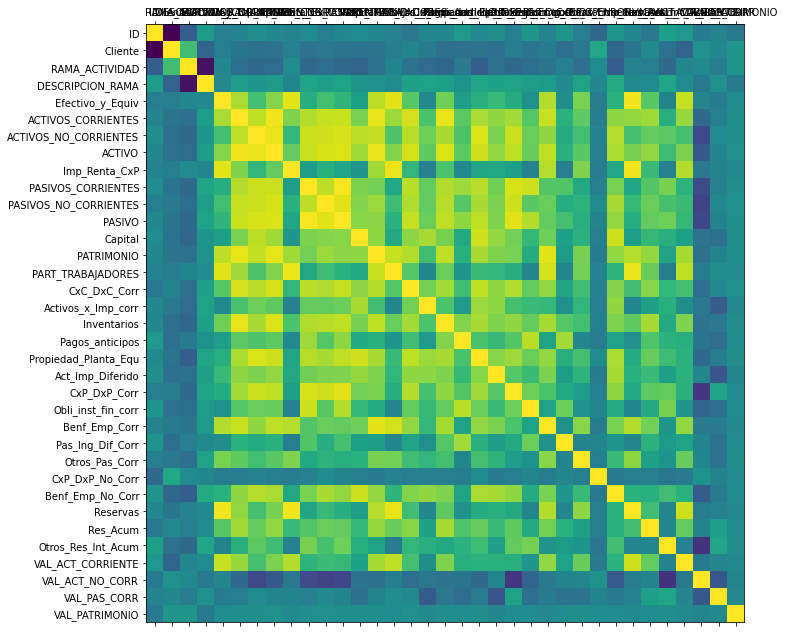

In [45]:
plot_correlation (df)

## 4. Feauture Selection & Engineering

In [46]:
#del df['ID']

In [47]:
df.columns

Index(['ID', 'Cliente', 'RAMA_ACTIVIDAD', 'DESCRIPCION_RAMA', 'Efectivo_y_Equiv', 'ACTIVOS_CORRIENTES', 'ACTIVOS_NO_CORRIENTES', 'ACTIVO', 'Imp_Renta_CxP', 'PASIVOS_CORRIENTES', 'PASIVOS_NO_CORRIENTES', 'PASIVO', 'Capital', 'PATRIMONIO', 'PART_TRABAJADORES', 'CxC_DxC_Corr', 'Activos_x_Imp_corr', 'Inventarios', 'Pagos_anticipos', 'Propiedad_Planta_Equ', 'Act_Imp_Diferido', 'CxP_DxP_Corr', 'Obli_inst_fin_corr', 'Benf_Emp_Corr', 'Pas_Ing_Dif_Corr', 'Otros_Pas_Corr', 'CxP_DxP_No_Corr', 'Benf_Emp_No_Corr', 'Reservas', 'Res_Acum', 'Otros_Res_Int_Acum', 'VAL_ACT_CORRIENTE', 'VAL_ACT_NO_CORR', 'VAL_PAS_CORR', 'VAL_PATRIMONIO'], dtype='object')

In [48]:
df.head(4)

,ID,Cliente,RAMA_ACTIVIDAD,DESCRIPCION_RAMA,Efectivo_y_Equiv,ACTIVOS_CORRIENTES,ACTIVOS_NO_CORRIENTES,ACTIVO,Imp_Renta_CxP,PASIVOS_CORRIENTES,PASIVOS_NO_CORRIENTES,PASIVO,Capital,PATRIMONIO,PART_TRABAJADORES,CxC_DxC_Corr,Activos_x_Imp_corr,Inventarios,Pagos_anticipos,Propiedad_Planta_Equ,Act_Imp_Diferido,CxP_DxP_Corr,Obli_inst_fin_corr,Benf_Emp_Corr,Pas_Ing_Dif_Corr,Otros_Pas_Corr,CxP_DxP_No_Corr,Benf_Emp_No_Corr,Reservas,Res_Acum,Otros_Res_Int_Acum,VAL_ACT_CORRIENTE,VAL_ACT_NO_CORR,VAL_PAS_CORR,VAL_PATRIMONIO
0,1,1,3,7,14117834.20,54617757.80,26814344.50,81432102.3,299848.12,30813080.90,14596311.80,45409392.70,17100004.0,36022709.6,772600.74,27436940.35,91498.22,11067076.67,140228.77,14381686.24,471362.49,20716400.57,5922849.35,1760287.93,0.0,0.00,0.0,5616264.10,12004989.40,6216582.31,701133.89,-0.03,2.000000e-02,-0.02,0.00
1,2,1,1,9,1699491.59,27231693.40,32338755.00,59570448.5,0.00,20120422.30,14596758.00,34717180.30,16683800.0,24853268.2,603540.76,16095012.34,916161.35,6565478.83,574629.58,24218128.87,195495.02,13259278.19,6284155.45,150307.22,0.0,0.00,0.0,1632911.88,2363950.85,5784715.18,20402.17,-0.04,-4.000000e-02,0.02,0.00
2,3,1,3,7,13312326.30,62152533.30,15905319.60,78057852.8,0.00,9965207.05,27597835.40,37563042.50,7029352.0,40494810.4,0.00,20014356.60,2383762.51,26289924.85,87886.02,10700172.96,745742.89,8165272.59,0.00,603995.37,0.0,0.00,0.0,3070479.24,3648871.13,29190306.23,626281.05,-0.07,4.000000e-02,0.00,-0.01
3,4,1,1,9,690572.85,9723424.67,5650292.81,15373717.5,0.00,2415155.75,2926078.96,5341234.71,2339000.0,10032482.8,103555.82,4244536.36,407908.27,4337815.53,42591.66,5563948.35,60544.46,1401959.51,498619.68,221078.81,0.0,293497.75,0.0,1819739.74,1157038.59,4595793.12,1940651.06,0.00,-1.862645e-09,0.00,0.03


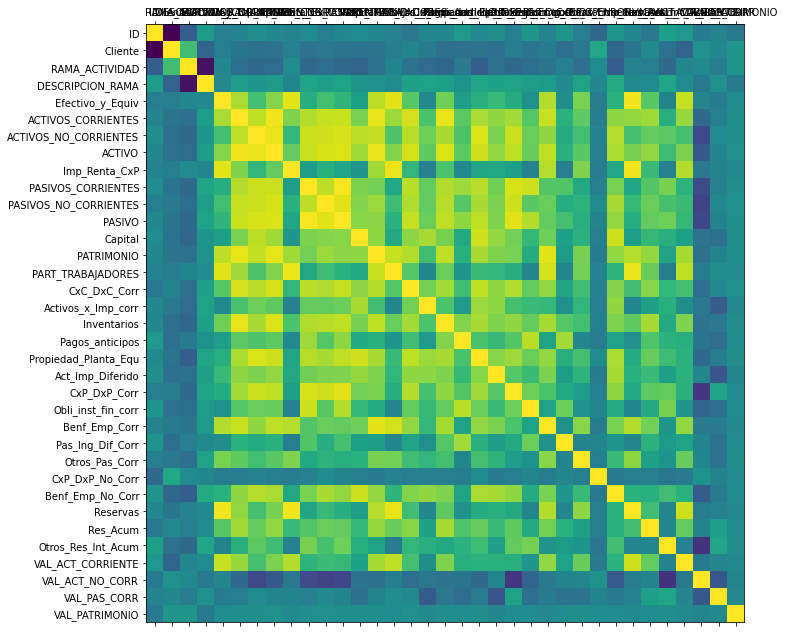

In [49]:
plot_correlation (df)

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [51]:
from sklearn.cluster import KMeans
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(df)

In [52]:
#plt.scatter(df[:,0], df[:,1])
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
#plt.show()

In [53]:
df.head(5)

,ID,Cliente,RAMA_ACTIVIDAD,DESCRIPCION_RAMA,Efectivo_y_Equiv,ACTIVOS_CORRIENTES,ACTIVOS_NO_CORRIENTES,ACTIVO,Imp_Renta_CxP,PASIVOS_CORRIENTES,PASIVOS_NO_CORRIENTES,PASIVO,Capital,PATRIMONIO,PART_TRABAJADORES,CxC_DxC_Corr,Activos_x_Imp_corr,Inventarios,Pagos_anticipos,Propiedad_Planta_Equ,Act_Imp_Diferido,CxP_DxP_Corr,Obli_inst_fin_corr,Benf_Emp_Corr,Pas_Ing_Dif_Corr,Otros_Pas_Corr,CxP_DxP_No_Corr,Benf_Emp_No_Corr,Reservas,Res_Acum,Otros_Res_Int_Acum,VAL_ACT_CORRIENTE,VAL_ACT_NO_CORR,VAL_PAS_CORR,VAL_PATRIMONIO
0,1,1,3,7,14117834.20,54617757.80,26814344.50,81432102.3,299848.12,30813080.90,14596311.80,45409392.70,17100004.0,36022709.6,772600.74,27436940.35,91498.22,11067076.67,140228.77,14381686.24,471362.49,20716400.57,5922849.35,1760287.93,0.00,0.00,0.00,5616264.10,12004989.40,6216582.31,701133.89,-0.03,2.000000e-02,-0.02,0.00
1,2,1,1,9,1699491.59,27231693.40,32338755.00,59570448.5,0.00,20120422.30,14596758.00,34717180.30,16683800.0,24853268.2,603540.76,16095012.34,916161.35,6565478.83,574629.58,24218128.87,195495.02,13259278.19,6284155.45,150307.22,0.00,0.00,0.00,1632911.88,2363950.85,5784715.18,20402.17,-0.04,-4.000000e-02,0.02,0.00
2,3,1,3,7,13312326.30,62152533.30,15905319.60,78057852.8,0.00,9965207.05,27597835.40,37563042.50,7029352.0,40494810.4,0.00,20014356.60,2383762.51,26289924.85,87886.02,10700172.96,745742.89,8165272.59,0.00,603995.37,0.00,0.00,0.00,3070479.24,3648871.13,29190306.23,626281.05,-0.07,4.000000e-02,0.00,-0.01
3,4,1,1,9,690572.85,9723424.67,5650292.81,15373717.5,0.00,2415155.75,2926078.96,5341234.71,2339000.0,10032482.8,103555.82,4244536.36,407908.27,4337815.53,42591.66,5563948.35,60544.46,1401959.51,498619.68,221078.81,0.00,293497.75,0.00,1819739.74,1157038.59,4595793.12,1940651.06,0.00,-1.862645e-09,0.00,0.03
4,5,1,1,9,921318.64,21743701.90,30953667.60,52697369.5,0.00,19307720.30,17302670.70,36610391.00,6572000.0,16086978.5,454324.89,13090114.95,722585.65,6611736.62,165828.16,30120450.32,85716.40,7896538.61,10428011.78,753344.11,106978.61,113418.05,3328554.75,1288320.12,535971.22,9449244.07,-470236.76,-0.01,3.000001e-02,0.00,-0.03


In [54]:
num_true = len(df.loc[df['Cliente'] == 1 ])
num_false = len (df.loc[df['Cliente'] == 0])

## 5. Model Training

**Algorithm Selected:**
  Naive Bayes
**Type:**
Bynari Classification

Splitting Data in training and testing


70% Training
30% Testing

In [55]:
import numpy as np
from sklearn.model_selection import train_test_split

In [56]:
df.columns

Index(['ID', 'Cliente', 'RAMA_ACTIVIDAD', 'DESCRIPCION_RAMA', 'Efectivo_y_Equiv', 'ACTIVOS_CORRIENTES', 'ACTIVOS_NO_CORRIENTES', 'ACTIVO', 'Imp_Renta_CxP', 'PASIVOS_CORRIENTES', 'PASIVOS_NO_CORRIENTES', 'PASIVO', 'Capital', 'PATRIMONIO', 'PART_TRABAJADORES', 'CxC_DxC_Corr', 'Activos_x_Imp_corr', 'Inventarios', 'Pagos_anticipos', 'Propiedad_Planta_Equ', 'Act_Imp_Diferido', 'CxP_DxP_Corr', 'Obli_inst_fin_corr', 'Benf_Emp_Corr', 'Pas_Ing_Dif_Corr', 'Otros_Pas_Corr', 'CxP_DxP_No_Corr', 'Benf_Emp_No_Corr', 'Reservas', 'Res_Acum', 'Otros_Res_Int_Acum', 'VAL_ACT_CORRIENTE', 'VAL_ACT_NO_CORR', 'VAL_PAS_CORR', 'VAL_PATRIMONIO'], dtype='object')

In [57]:
feature_columns =   [
                    'RAMA_ACTIVIDAD', 'DESCRIPCION_RAMA', 'Efectivo_y_Equiv', 'ACTIVOS_CORRIENTES', 'ACTIVOS_NO_CORRIENTES', 'ACTIVO', 'Imp_Renta_CxP', 'PASIVOS_CORRIENTES', 'PASIVOS_NO_CORRIENTES', 'PASIVO', 'Capital', 'PATRIMONIO', 'PART_TRABAJADORES', 'CxC_DxC_Corr', 'Activos_x_Imp_corr', 'Inventarios', 'Pagos_anticipos', 'Propiedad_Planta_Equ', 'Act_Imp_Diferido', 'CxP_DxP_Corr', 'Obli_inst_fin_corr', 'Benf_Emp_Corr', 'Pas_Ing_Dif_Corr', 'Otros_Pas_Corr', 'CxP_DxP_No_Corr', 'Benf_Emp_No_Corr', 'Reservas', 'Res_Acum', 'Otros_Res_Int_Acum', 'VAL_ACT_CORRIENTE', 'VAL_ACT_NO_CORR', 'VAL_PAS_CORR', 'VAL_PATRIMONIO', 'Cliente'
                    ]
predicted_class_names = ['Cliente']

In [58]:
feature_columns =   [
                  'RAMA_ACTIVIDAD',
                   'CxP_DxP_No_Corr',       
                   'VAL_PATRIMONIO'  ,


                    'Inventarios'  ,
                    'ACTIVOS_NO_CORRIENTES'  ,
                    'Pagos_anticipos'  ,
                    'Act_Imp_Diferido'  ,
                    'Pas_Ing_Dif_Corr'  ,
                    'Benf_Emp_No_Corr'  ,
                    'VAL_ACT_CORRIENTE'  ,
                    'DESCRIPCION_RAMA'  


                    ]
predicted_class_names = ['Cliente']

In [59]:
X = df[feature_columns].values
y = df[predicted_class_names].values # predicted class


In [60]:
#dividimos 70 / 30
split_test_size = 0.30

In [61]:
X_train, X_test, y_train, y_test = train_test_split ( X, y, test_size = split_test_size, random_state = 33 )

Review if it is 70 % for training and 30 % of testing

In [62]:
print('Splitting')
print("{0:0.2f}% in training dataset".format((len(X_train)/len(df.index))*100))
print("{0:0.2f}% in testing dataset".format((len(X_test)/len(df.index))*100))

Splitting
70.00% in training dataset
30.00% in testing dataset


Let's check the distribution of true en false cases

In [63]:
print('Original True : {0}  ({1:0.2f}%)'.format(len(df.loc[df['Cliente'] == 1]),   (len(df.loc[df['Cliente'] == 1]) / len(df.index))  *100))
print('Original False : {0}  ({1:0.2f}%)'.format(len(df.loc[df['Cliente'] == 0]),   (len(df.loc[df['Cliente'] == 0]) / len(df.index)) *100))
print('Original Total : {0}  ({1:0.2f}%)'.format(len(df.loc[df['Cliente'] ]),   (len(df.loc[df['Cliente'] ]) / len(df.index)) *100))
print('')
print('Training True : {0}  ({1:0.2f}%)'.format(len(y_train[y_train[:] == 1]),   (len(y_train[y_train[:] == 1]) / len(y_train) * 100)))
print('Training False : {0}  ({1:0.2f}%)'.format(len(y_train[y_train[:] == 0]),   (len(y_train[y_train[:] == 0]) / len(y_train) * 100)))
print('Training Total : {0}  ({1:0.2f}%)'.format(len(y_train[y_train[:] ]),   (len(y_train[y_train[:] ]) / len(y_train) * 100)))
print('')
print('Test True : {0}  ({1:0.2f}%)'.format(len(y_test[y_test[:] == 1]),   (len(y_test[y_test[:] == 1]) / len(y_test) * 100)))
print('Test False : {0}  ({1:0.2f}%)'.format(len(y_test[y_test[:] == 0]),   (len(y_test[y_test[:] == 0]) / len(y_test) * 100)))
print('Test Total : {0}  ({1:0.2f}%)'.format(len(y_test[y_test[:] ]),   (len(y_test[y_test[:] ]) / len(y_test) * 100)))

Original True : 26  (43.33%)
Original False : 34  (56.67%)
Original Total : 60  (100.00%)

Training True : 18  (42.86%)
Training False : 24  (57.14%)
Training Total : 42  (100.00%)

Test True : 8  (44.44%)
Test False : 10  (55.56%)
Test Total : 18  (100.00%)


Post-split Data Preparation

In [64]:
df.head()

,ID,Cliente,RAMA_ACTIVIDAD,DESCRIPCION_RAMA,Efectivo_y_Equiv,ACTIVOS_CORRIENTES,ACTIVOS_NO_CORRIENTES,ACTIVO,Imp_Renta_CxP,PASIVOS_CORRIENTES,PASIVOS_NO_CORRIENTES,PASIVO,Capital,PATRIMONIO,PART_TRABAJADORES,CxC_DxC_Corr,Activos_x_Imp_corr,Inventarios,Pagos_anticipos,Propiedad_Planta_Equ,Act_Imp_Diferido,CxP_DxP_Corr,Obli_inst_fin_corr,Benf_Emp_Corr,Pas_Ing_Dif_Corr,Otros_Pas_Corr,CxP_DxP_No_Corr,Benf_Emp_No_Corr,Reservas,Res_Acum,Otros_Res_Int_Acum,VAL_ACT_CORRIENTE,VAL_ACT_NO_CORR,VAL_PAS_CORR,VAL_PATRIMONIO
0,1,1,3,7,14117834.20,54617757.80,26814344.50,81432102.3,299848.12,30813080.90,14596311.80,45409392.70,17100004.0,36022709.6,772600.74,27436940.35,91498.22,11067076.67,140228.77,14381686.24,471362.49,20716400.57,5922849.35,1760287.93,0.00,0.00,0.00,5616264.10,12004989.40,6216582.31,701133.89,-0.03,2.000000e-02,-0.02,0.00
1,2,1,1,9,1699491.59,27231693.40,32338755.00,59570448.5,0.00,20120422.30,14596758.00,34717180.30,16683800.0,24853268.2,603540.76,16095012.34,916161.35,6565478.83,574629.58,24218128.87,195495.02,13259278.19,6284155.45,150307.22,0.00,0.00,0.00,1632911.88,2363950.85,5784715.18,20402.17,-0.04,-4.000000e-02,0.02,0.00
2,3,1,3,7,13312326.30,62152533.30,15905319.60,78057852.8,0.00,9965207.05,27597835.40,37563042.50,7029352.0,40494810.4,0.00,20014356.60,2383762.51,26289924.85,87886.02,10700172.96,745742.89,8165272.59,0.00,603995.37,0.00,0.00,0.00,3070479.24,3648871.13,29190306.23,626281.05,-0.07,4.000000e-02,0.00,-0.01
3,4,1,1,9,690572.85,9723424.67,5650292.81,15373717.5,0.00,2415155.75,2926078.96,5341234.71,2339000.0,10032482.8,103555.82,4244536.36,407908.27,4337815.53,42591.66,5563948.35,60544.46,1401959.51,498619.68,221078.81,0.00,293497.75,0.00,1819739.74,1157038.59,4595793.12,1940651.06,0.00,-1.862645e-09,0.00,0.03
4,5,1,1,9,921318.64,21743701.90,30953667.60,52697369.5,0.00,19307720.30,17302670.70,36610391.00,6572000.0,16086978.5,454324.89,13090114.95,722585.65,6611736.62,165828.16,30120450.32,85716.40,7896538.61,10428011.78,753344.11,106978.61,113418.05,3328554.75,1288320.12,535971.22,9449244.07,-470236.76,-0.01,3.000001e-02,0.00,-0.03


In [65]:
df.shape

(60, 35)

Analyzing zero values

In [66]:
df.isin([0]).sum()
#np.count_nonzero(df)

ID                        0
Cliente                  34
RAMA_ACTIVIDAD            3
DESCRIPCION_RAMA          3
Efectivo_y_Equiv          0
ACTIVOS_CORRIENTES        0
ACTIVOS_NO_CORRIENTES     1
ACTIVO                    0
Imp_Renta_CxP            35
PASIVOS_CORRIENTES        0
PASIVOS_NO_CORRIENTES     6
PASIVO                    0
Capital                   0
PATRIMONIO                0
PART_TRABAJADORES        19
CxC_DxC_Corr              1
Activos_x_Imp_corr        8
Inventarios              12
Pagos_anticipos          14
Propiedad_Planta_Equ      2
Act_Imp_Diferido         16
CxP_DxP_Corr              3
Obli_inst_fin_corr       24
Benf_Emp_Corr             4
Pas_Ing_Dif_Corr         29
Otros_Pas_Corr           35
CxP_DxP_No_Corr          37
Benf_Emp_No_Corr          7
Reservas                  2
Res_Acum                  0
Otros_Res_Int_Acum       11
VAL_ACT_CORRIENTE        23
VAL_ACT_NO_CORR          15
VAL_PAS_CORR             28
VAL_PATRIMONIO           30
dtype: int64

**Impute with the mean**

In [67]:
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(missing_values=0, strategy='mean')

In [68]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)

Training Initial Algorithm Naive Bayes

In [69]:
from sklearn.naive_bayes import GaussianNB

#Creating the model
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

## 6. Model Evaluation MODELO DE CLASIFICACION  SUPERVISADA.

**Performance on Training Data**

In [70]:
#Predicting values using the training dataset
nb_predict_train = nb_model.predict(X_train)

#import performance metrics library
from sklearn import metrics

#Check Accurary
print('Accurary: {0:.4f}'.format (metrics.accuracy_score(y_train, nb_predict_train)))

Accurary: 0.5238


**Performance on Testing Data**

In [71]:
#Predicting values using the testing dataset
nb_predict_test = nb_model.predict(X_test)

#import performance metrics library
from sklearn import metrics

#Check Accurary
print('Accurary: {0:.4f}'.format (metrics.accuracy_score(y_test, nb_predict_test)))

Accurary: 0.5556


**Confusion Matrix**

In [72]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print('')
print('TN    FP')
print('FN    TP')
# TN FP
#FN  TP

Confusion Matrix
[[2 8]
 [0 8]]

TN    FP
FN    TP


In [73]:
print('Classification Report')
print(metrics.classification_report(y_test, nb_predict_test))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.20      0.33        10
           1       0.50      1.00      0.67         8

    accuracy                           0.56        18
   macro avg       0.75      0.60      0.50        18
weighted avg       0.78      0.56      0.48        18



### Random Forest

**Trying another algorith: Random Forest**

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Predicting training dataset

In [76]:
#Predicting values using the training dataset
rf_predict_train = rf_model.predict(X_train)

#import performance metrics library
from sklearn import metrics

#Check Accurary
print('Accurary: {0:.4f}'.format (metrics.accuracy_score(y_train, rf_predict_train)))

Accurary: 1.0000


Predicting test dataset

In [77]:
#Predicting values using the testing dataset
rf_predict_test = nb_model.predict(X_test)


#Check Accurary
print('Accurary: {0:.4f}'.format (metrics.accuracy_score(y_test, rf_predict_test)))

Accurary: 0.5556


In [78]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test)))
print('')
print('TN    FP')
print('FN    TP')
# TN FP
#FN  TP

Confusion Matrix
[[2 8]
 [0 8]]

TN    FP
FN    TP


In [79]:
print('Classification Report')
print(metrics.classification_report(y_test, rf_predict_test))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.20      0.33        10
           1       0.50      1.00      0.67         8

    accuracy                           0.56        18
   macro avg       0.75      0.60      0.50        18
weighted avg       0.78      0.56      0.48        18



#### **Logistic Regression**

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
logreg = LogisticRegression(max_iter=1000)

In [82]:
lr_model = LogisticRegression(C=0.7, random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

In [83]:
#training metrics


#Check Accurary
print('Accurary: {0:.4f}'.format (metrics.accuracy_score(y_test, lr_predict_test)))

Accurary: 0.6667


In [84]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test)))
print('')
print('TN    FP')
print('FN    TP')
# TN FP
#FN  TP

Confusion Matrix
[[5 5]
 [1 7]]

TN    FP
FN    TP


In [85]:
print('Classification Report')
print(metrics.classification_report(y_test, lr_predict_test))

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.50      0.62        10
           1       0.58      0.88      0.70         8

    accuracy                           0.67        18
   macro avg       0.71      0.69      0.66        18
weighted avg       0.72      0.67      0.66        18



**Setting Regularization parameter**

1st max  value of 0.875 ocurred at C= 0.100000


Text(0, 0.5, 'recall score')

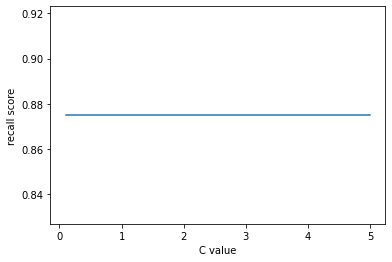

In [86]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while(C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression (C=C_val, random_state=42,solver='liblinear', max_iter=1000000)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if(recall_score > best_recall_score):
      best_recall_score = recall_score
      best_lr_predict_test = lr_predict_loop_test

    C_val = C_val + C_inc

best_score_C_val = C_values [recall_scores.index(best_recall_score)]
print("1st max  value of {0:.3f} ocurred at C= {1:3f}".format(best_recall_score, best_score_C_val))


%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

***Logistic Regression parametrization class balanced***

class_weight='balanced'

1st max  value of 0.875 ocurred at C= 0.100000


Text(0, 0.5, 'recall score')

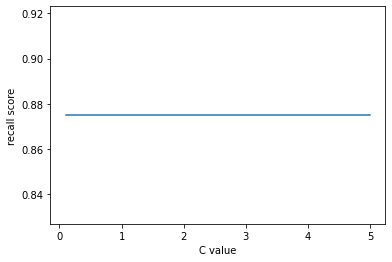

In [87]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while(C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression (C=C_val, random_state=42,solver='liblinear', class_weight='balanced' ,max_iter=1000000)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if(recall_score > best_recall_score):
      best_recall_score = recall_score
      best_lr_predict_test = lr_predict_loop_test

    C_val = C_val + C_inc

best_score_C_val = C_values [recall_scores.index(best_recall_score)]
print("1st max  value of {0:.3f} ocurred at C= {1:3f}".format(best_recall_score, best_score_C_val))


%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

In [88]:
lr_model = LogisticRegression(C=best_score_C_val, random_state=42, class_weight='balanced',  max_iter=1000)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

Training metrics

In [89]:
#Check Accurary
print('Accurary: {0:.4f}'.format (metrics.accuracy_score(y_test, lr_predict_test)))

Accurary: 0.6111


In [90]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test)))
print('')
print('TN    FP')
print('FN    TP')
# TN FP
#FN  TP

Confusion Matrix
[[4 6]
 [1 7]]

TN    FP
FN    TP


In [91]:
print('Classification Report')
print(metrics.classification_report(y_test, lr_predict_test))

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.40      0.53        10
           1       0.54      0.88      0.67         8

    accuracy                           0.61        18
   macro avg       0.67      0.64      0.60        18
weighted avg       0.68      0.61      0.59        18



In [92]:
print(metrics.recall_score(y_test, lr_predict_test))

0.875


#### **K-fold Cross Validation**
#### Logistic Regression with Cross Validation (CV)

In [93]:
from sklearn.linear_model import LogisticRegressionCV

lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=True, class_weight="balanced", solver='liblinear') #set hyperparameters
lr_cv_model.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=-1, penalty='l2',
                     random_state=42, refit=True, scoring=None,
                     solver='liblinear', tol=0.0001, verbose=0)

## 7. Prediction

In [94]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

Training metrics

In [95]:
#Check Accurary
print('Accurary: {0:.4f}'.format (metrics.accuracy_score(y_test, lr_cv_predict_test)))

Accurary: 0.6111


In [96]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, lr_cv_predict_test)))
print('')
print('TN    FP')
print('FN    TP')
# TN FP
#FN  TP

Confusion Matrix
[[4 6]
 [1 7]]

TN    FP
FN    TP


In [97]:
print('Classification Report')
print(metrics.classification_report(y_test, lr_cv_predict_test))

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.40      0.53        10
           1       0.54      0.88      0.67         8

    accuracy                           0.61        18
   macro avg       0.67      0.64      0.60        18
weighted avg       0.68      0.61      0.59        18



In [98]:
print(metrics.recall_score(y_test, lr_cv_predict_test))

0.875


# Clustering  - MODELO DE CLASIFICACION NO SUPERVISADA.

In [99]:
df.head()

,ID,Cliente,RAMA_ACTIVIDAD,DESCRIPCION_RAMA,Efectivo_y_Equiv,ACTIVOS_CORRIENTES,ACTIVOS_NO_CORRIENTES,ACTIVO,Imp_Renta_CxP,PASIVOS_CORRIENTES,PASIVOS_NO_CORRIENTES,PASIVO,Capital,PATRIMONIO,PART_TRABAJADORES,CxC_DxC_Corr,Activos_x_Imp_corr,Inventarios,Pagos_anticipos,Propiedad_Planta_Equ,Act_Imp_Diferido,CxP_DxP_Corr,Obli_inst_fin_corr,Benf_Emp_Corr,Pas_Ing_Dif_Corr,Otros_Pas_Corr,CxP_DxP_No_Corr,Benf_Emp_No_Corr,Reservas,Res_Acum,Otros_Res_Int_Acum,VAL_ACT_CORRIENTE,VAL_ACT_NO_CORR,VAL_PAS_CORR,VAL_PATRIMONIO
0,1,1,3,7,14117834.20,54617757.80,26814344.50,81432102.3,299848.12,30813080.90,14596311.80,45409392.70,17100004.0,36022709.6,772600.74,27436940.35,91498.22,11067076.67,140228.77,14381686.24,471362.49,20716400.57,5922849.35,1760287.93,0.00,0.00,0.00,5616264.10,12004989.40,6216582.31,701133.89,-0.03,2.000000e-02,-0.02,0.00
1,2,1,1,9,1699491.59,27231693.40,32338755.00,59570448.5,0.00,20120422.30,14596758.00,34717180.30,16683800.0,24853268.2,603540.76,16095012.34,916161.35,6565478.83,574629.58,24218128.87,195495.02,13259278.19,6284155.45,150307.22,0.00,0.00,0.00,1632911.88,2363950.85,5784715.18,20402.17,-0.04,-4.000000e-02,0.02,0.00
2,3,1,3,7,13312326.30,62152533.30,15905319.60,78057852.8,0.00,9965207.05,27597835.40,37563042.50,7029352.0,40494810.4,0.00,20014356.60,2383762.51,26289924.85,87886.02,10700172.96,745742.89,8165272.59,0.00,603995.37,0.00,0.00,0.00,3070479.24,3648871.13,29190306.23,626281.05,-0.07,4.000000e-02,0.00,-0.01
3,4,1,1,9,690572.85,9723424.67,5650292.81,15373717.5,0.00,2415155.75,2926078.96,5341234.71,2339000.0,10032482.8,103555.82,4244536.36,407908.27,4337815.53,42591.66,5563948.35,60544.46,1401959.51,498619.68,221078.81,0.00,293497.75,0.00,1819739.74,1157038.59,4595793.12,1940651.06,0.00,-1.862645e-09,0.00,0.03
4,5,1,1,9,921318.64,21743701.90,30953667.60,52697369.5,0.00,19307720.30,17302670.70,36610391.00,6572000.0,16086978.5,454324.89,13090114.95,722585.65,6611736.62,165828.16,30120450.32,85716.40,7896538.61,10428011.78,753344.11,106978.61,113418.05,3328554.75,1288320.12,535971.22,9449244.07,-470236.76,-0.01,3.000001e-02,0.00,-0.03


In [100]:
df.shape

(60, 35)

In [101]:
datacluster.shape

(1826, 35)

In [102]:
#Change SI to 1 and No to 0
cliente_map = {'Si': 1, 'No': 0}
datacluster['Cliente'] = datacluster['Cliente'].map(cliente_map)
#Converting the Categorical variables to numbers
datacluster['RAMA_ACTIVIDAD'] =datacluster['RAMA_ACTIVIDAD'].astype('category').cat.codes
datacluster['DESCRIPCION_RAMA'] =datacluster['DESCRIPCION_RAMA'].astype('category').cat.codes

In [103]:
# Importing the dataset

X = datacluster.iloc[:, 2:34].values
# y = dataset.iloc[:, 3].values

In [104]:
print(X)

[[ 6.00000000e+00  8.00000000e+00  1.41178342e+07 ... -3.00000012e-02
   1.99999958e-02 -2.00000033e-02]
 [ 2.00000000e+00  1.30000000e+01  1.69949159e+06 ... -4.00000028e-02
  -3.99999991e-02  1.99999996e-02]
 [ 6.00000000e+00  8.00000000e+00  1.33123263e+07 ... -6.99999928e-02
   4.00000047e-02  0.00000000e+00]
 ...
 [ 4.00000000e+00  1.00000000e+01  1.43696254e+06 ...  0.00000000e+00
   2.32830644e-10  0.00000000e+00]
 [ 2.00000000e+00  1.30000000e+01  1.09478100e+04 ...  0.00000000e+00
   1.16415322e-10  0.00000000e+00]
 [ 0.00000000e+00  6.00000000e+00  4.52697000e+03 ...  0.00000000e+00
  -1.16415322e-10  0.00000000e+00]]


In [105]:
print (X.shape)

(1826, 32)


In [106]:
# Build the k-means model
kmeans = KMeans(n_clusters=3) # You want cluster the passenger records into 2: Survived or Not survived
# Fit the unlabeled training dataset X to the model
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [107]:
# Set parameters of the model
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [108]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

In [109]:

# Splitting the dataset into the Training set and Test set
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""


'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

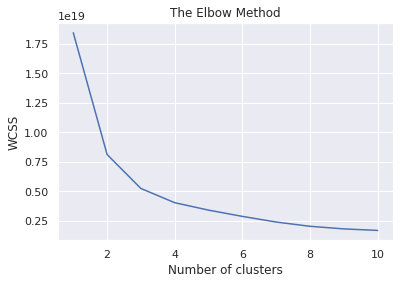

In [110]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [111]:

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 10, init = 'k-means++', random_state = 60) #42
y_kmeans = kmeans.fit_predict(X)

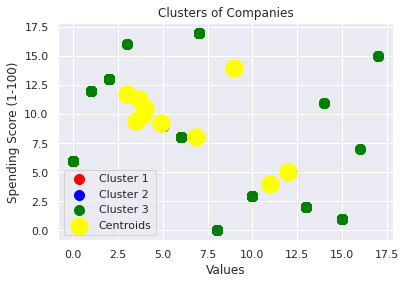

In [112]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Companies')
plt.xlabel('Values')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [113]:
print(y_kmeans)

[0 6 0 ... 2 2 2]


In [114]:
print(X)

[[ 6.00000000e+00  8.00000000e+00  1.41178342e+07 ... -3.00000012e-02
   1.99999958e-02 -2.00000033e-02]
 [ 2.00000000e+00  1.30000000e+01  1.69949159e+06 ... -4.00000028e-02
  -3.99999991e-02  1.99999996e-02]
 [ 6.00000000e+00  8.00000000e+00  1.33123263e+07 ... -6.99999928e-02
   4.00000047e-02  0.00000000e+00]
 ...
 [ 4.00000000e+00  1.00000000e+01  1.43696254e+06 ...  0.00000000e+00
   2.32830644e-10  0.00000000e+00]
 [ 2.00000000e+00  1.30000000e+01  1.09478100e+04 ...  0.00000000e+00
   1.16415322e-10  0.00000000e+00]
 [ 0.00000000e+00  6.00000000e+00  4.52697000e+03 ...  0.00000000e+00
  -1.16415322e-10  0.00000000e+00]]


In [115]:
cluster = pd.DataFrame(y_kmeans, columns = ['Cluster'])

In [116]:
cluster.head(50)

,Cluster
0,0
1,6
2,0
3,2
4,6
5,2
6,2
7,2
8,2
9,2


In [117]:
cluster.shape

(1826, 1)

In [118]:
n = cluster.nunique(axis=0) 
  
print("No.of.unique values in each column :\n", 
      n)

No.of.unique values in each column :
 Cluster    10
dtype: int64


In [119]:
cluster.groupby(['Cluster']).size()

Cluster
0      66
1       1
2    1549
3       8
4       4
5      23
6     171
7       1
8       1
9       2
dtype: int64

In [120]:
result = pd.concat([datacluster, cluster], axis=1)

In [121]:
result.head(50)

,ID,Cliente,RAMA_ACTIVIDAD,DESCRIPCION_RAMA,Efectivo_y_Equiv,ACTIVOS_CORRIENTES,ACTIVOS_NO_CORRIENTES,ACTIVO,Imp_Renta_CxP,PASIVOS_CORRIENTES,PASIVOS_NO_CORRIENTES,PASIVO,Capital,PATRIMONIO,PART_TRABAJADORES,CxC_DxC_Corr,Activos_x_Imp_corr,Inventarios,Pagos_anticipos,Propiedad_Planta_Equ,Act_Imp_Diferido,CxP_DxP_Corr,Obli_inst_fin_corr,Benf_Emp_Corr,Pas_Ing_Dif_Corr,Otros_Pas_Corr,CxP_DxP_No_Corr,Benf_Emp_No_Corr,Reservas,Res_Acum,Otros_Res_Int_Acum,VAL_ACT_CORRIENTE,VAL_ACT_NO_CORR,VAL_PAS_CORR,VAL_PATRIMONIO,Cluster
0,1,1,6,8,14117834.20,5.461776e+07,2.681434e+07,8.143210e+07,299848.12,30813080.90,14596311.80,4.540939e+07,17100004.0,3.602271e+07,772600.74,27436940.35,91498.22,11067076.67,140228.77,14381686.24,471362.49,20716400.57,5922849.35,1760287.93,0.00,0.00,0.00,5616264.10,1.200499e+07,6216582.31,701133.89,-3.000000e-02,2.000000e-02,-2.000000e-02,0.000000e+00,0
1,2,1,2,13,1699491.59,2.723169e+07,3.233876e+07,5.957045e+07,0.00,20120422.30,14596758.00,3.471718e+07,16683800.0,2.485327e+07,603540.76,16095012.34,916161.35,6565478.83,574629.58,24218128.87,195495.02,13259278.19,6284155.45,150307.22,0.00,0.00,0.00,1632911.88,2.363951e+06,5784715.18,20402.17,-4.000000e-02,-4.000000e-02,2.000000e-02,0.000000e+00,6
2,3,1,6,8,13312326.30,6.215253e+07,1.590532e+07,7.805785e+07,0.00,9965207.05,27597835.40,3.756304e+07,7029352.0,4.049481e+07,0.00,20014356.60,2383762.51,26289924.85,87886.02,10700172.96,745742.89,8165272.59,0.00,603995.37,0.00,0.00,0.00,3070479.24,3.648871e+06,29190306.23,626281.05,-6.999999e-02,4.000000e-02,0.000000e+00,-9.999998e-03,0
3,4,1,2,13,690572.85,9.723425e+06,5.650293e+06,1.537372e+07,0.00,2415155.75,2926078.96,5.341235e+06,2339000.0,1.003248e+07,103555.82,4244536.36,407908.27,4337815.53,42591.66,5563948.35,60544.46,1401959.51,498619.68,221078.81,0.00,293497.75,0.00,1819739.74,1.157039e+06,4595793.12,1940651.06,0.000000e+00,-1.862645e-09,0.000000e+00,3.000000e-02,2
4,5,1,2,13,921318.64,2.174370e+07,3.095367e+07,5.269737e+07,0.00,19307720.30,17302670.70,3.661039e+07,6572000.0,1.608698e+07,454324.89,13090114.95,722585.65,6611736.62,165828.16,30120450.32,85716.40,7896538.61,10428011.78,753344.11,106978.61,113418.05,3328554.75,1288320.12,5.359712e+05,9449244.07,-470236.76,-1.000000e-02,3.000001e-02,0.000000e+00,-3.000000e-02,6
5,6,1,6,8,230189.26,4.831241e+06,5.032966e+05,5.334537e+06,0.00,2611260.53,1608236.58,4.219497e+06,405000.0,1.115040e+06,0.00,2446930.22,110592.04,2043529.09,0.00,453662.57,49634.07,2566138.04,0.00,45122.49,0.00,0.00,1467003.17,141233.41,5.034308e+04,572545.31,87151.75,9.313226e-10,5.820766e-11,-4.656613e-10,-2.328306e-10,2
6,7,1,7,17,2008119.06,7.368570e+06,4.137755e+06,1.150632e+07,23960.91,4205869.34,5443746.68,9.649616e+06,410365.0,1.856709e+06,180044.59,4880019.95,154267.17,0.00,56243.39,2156544.25,728449.58,1432001.64,0.00,1801598.47,18456.40,287066.66,0.00,3780128.93,3.336382e+05,811763.53,300941.93,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2
7,8,1,10,3,2036250.51,2.281064e+06,4.532250e+05,2.734289e+06,0.00,534700.96,470004.79,1.004706e+06,1000000.0,1.729583e+06,137965.07,231915.32,0.00,0.00,12898.36,348592.58,20927.75,43699.33,0.00,215286.05,0.00,0.00,0.00,254010.51,7.563259e+04,649128.23,4822.61,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2
8,9,1,7,17,7580682.89,1.148690e+07,1.558120e+05,1.164271e+07,586608.72,1738716.95,1758802.57,3.497520e+06,25000.0,8.145188e+06,483193.10,3359767.97,545515.13,0.00,929.60,8862.38,143148.62,327226.28,0.00,814881.95,0.00,0.00,0.00,1758802.57,5.000000e+03,7975267.72,139920.35,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,2
9,10,1,6,8,885618.03,3.604916e+06,7.671982e+05,4.372114e+06,75506.00,1400637.95,371332.03,1.771970e+06,6000.0,2.600144e+06,46492.27,308752.17,104222.24,2296856.29,9467.22,535632.48,30916.10,687039.15,488177.21,129650.49,20265.10,0.00,5058.65,366273.38,1.324334e+04,2560830.37,20070.44,0.000000e+00,1.164153e-10,0.000000e+00,0.000000e+00,2


In [122]:
clientespotencialescluster = [0,6,5]
result = result [result.Cluster.isin(clientespotencialescluster)]

In [123]:
result.shape

(260, 36)

In [124]:
totalclientespontenciales =  result[result['ID']>26]

In [125]:
totalclientespontenciales.shape

(250, 36)

In [126]:
totalclientespontenciales.head(5)

,ID,Cliente,RAMA_ACTIVIDAD,DESCRIPCION_RAMA,Efectivo_y_Equiv,ACTIVOS_CORRIENTES,ACTIVOS_NO_CORRIENTES,ACTIVO,Imp_Renta_CxP,PASIVOS_CORRIENTES,PASIVOS_NO_CORRIENTES,PASIVO,Capital,PATRIMONIO,PART_TRABAJADORES,CxC_DxC_Corr,Activos_x_Imp_corr,Inventarios,Pagos_anticipos,Propiedad_Planta_Equ,Act_Imp_Diferido,CxP_DxP_Corr,Obli_inst_fin_corr,Benf_Emp_Corr,Pas_Ing_Dif_Corr,Otros_Pas_Corr,CxP_DxP_No_Corr,Benf_Emp_No_Corr,Reservas,Res_Acum,Otros_Res_Int_Acum,VAL_ACT_CORRIENTE,VAL_ACT_NO_CORR,VAL_PAS_CORR,VAL_PATRIMONIO,Cluster
26,27,0,6,8,949115.15,24143057.7,405759.39,24548817.1,178471.78,15264110.6,2427096.40,17691207.0,500000.0,6.857610e+06,102469.15,9646340.46,887366.17,11062474.70,2915.86,263646.66,92358.13,6154591.27,8054270.71,320115.55,0.00,0.00,124726.85,166602.68,2.500000e+05,6106912.07,698.00,0.04,1.164153e-10,0.02,0.00,6
27,28,0,2,13,5014936.09,23283263.0,21860788.80,45144051.8,0.00,12973978.8,9140089.67,22114068.5,15865800.0,2.302998e+07,303389.15,11247979.99,217501.37,6237016.28,515777.75,16390271.09,144568.85,6686355.42,3643892.10,1393884.50,17479.87,446739.87,0.00,2721079.17,1.025651e+07,1294647.12,3385792.11,0.02,1.000000e-01,0.01,0.01,6
29,30,0,6,8,7729001.13,35291988.1,13939698.50,49231686.5,0.00,18872873.6,7148291.52,26021165.1,11000000.0,2.321052e+07,313005.78,18776127.42,225181.05,8561678.46,0.00,7830246.53,0.00,1115746.50,12457759.60,435399.52,812085.41,324257.13,220274.84,1044878.00,6.708344e+06,1410011.22,4092166.37,0.04,3.000000e-02,0.03,-0.01,6
30,31,0,6,8,7544171.91,107506408.0,57222699.00,164729107.0,0.00,66234109.7,35479727.80,101713837.0,22327505.0,6.301527e+07,798151.43,22053646.78,973739.66,72275442.88,3261811.09,38695442.49,362194.20,27698191.75,24583268.40,2178560.63,2040385.68,0.00,0.00,5833943.28,5.545048e+06,44612739.28,943200.94,0.20,-6.999999e-02,0.01,0.02,5
31,32,0,6,8,80283492.70,175034341.0,77938277.90,252972618.0,5859591.91,32961815.8,28284310.60,61246126.4,16500000.0,1.917265e+08,6359153.27,33754664.29,13502.00,60576419.46,406262.09,34452294.84,840161.76,16244667.30,0.00,9059872.79,7453.91,1289563.12,0.00,8253054.42,1.413830e+08,33826847.31,16613.10,0.46,-3.999999e-02,0.00,0.39,5


In [127]:
totalclientespontenciales.groupby(['Cluster']).size()

Cluster
0     62
5     23
6    165
dtype: int64

In [128]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [129]:
import csv
totalclientespontenciales.to_csv('/content/gdrive/My Drive/data/dataton/aneficlientespotenciales.csv' , index=False , quoting=csv.QUOTE_NONNUMERIC)